(266, 251, 3)


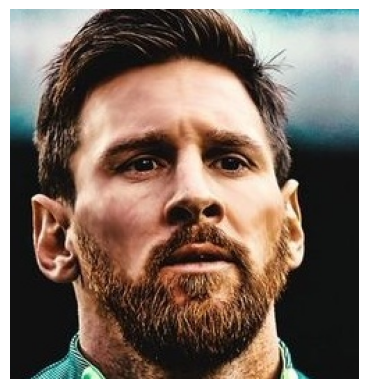

In [7]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import pandas as pd
# reading the image
img = imread(r"E:\PyCharm\pythonProject\AIL\DataSets\archive\105_classes_pins_dataset\pins_Lionel Messi\Lionel Messi14_3108.jpg")
plt.axis("off")
plt.imshow(img)
print(img.shape)

(128, 64, 3)


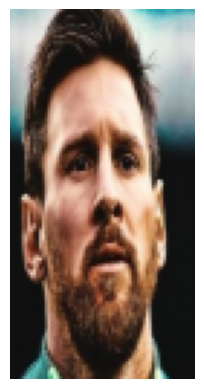

In [8]:
resized_img = resize(img, (128, 64))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

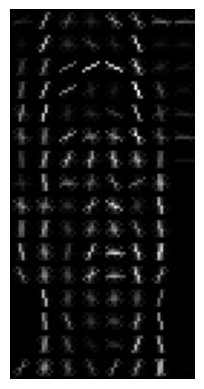

In [9]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, channel_axis=-1)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [10]:
fd.shape

(3780,)

In [11]:
fd

array([0.04254521, 0.        , 0.10577521, ..., 0.00287576, 0.00741108,
       0.00513726])

In [6]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
import os
import pandas as pd

In [17]:
def compute_hog(image):
    # Resize image to a fixed size (optional)
    resized_img = resize(image, (128, 64))
    
    # Compute HOG descriptors
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    
    return fd, hog_image

# Function to save HOG descriptors to CSV
def save_hog_to_csv(hog_descriptors, labels, output_csv_path, header=None):
    # Create a DataFrame from the HOG descriptors
    df = pd.DataFrame(hog_descriptors)
    
    # Add the labels as the first column
    df.insert(0, 'label', labels)
    
    # Save the DataFrame to a CSV file with column headers
    df.to_csv(output_csv_path, index=False, header=header)

# Function to process all images in a directory and assign labels
def process_images_in_directory(directory_path, output_csv_path):
    hog_descriptors_list = []
    labels = []
    
    # Loop over all files and subdirectories in the directory
    for root, dirs, files in os.walk(directory_path):
        for filename in files:
            # Construct the full file path
            file_path = os.path.join(root, filename)
            
            # Check if the file is an image
            if file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                # Read the image
                image = imread(file_path)
                
                # Compute HOG descriptors
                fd, hog_image = compute_hog(image)
                
                # Append HOG descriptors to the list
                hog_descriptors_list.append(fd.flatten())
                
                # Extract label from the directory name
                # For example, using the name of the parent directory as the label
                label = os.path.basename(root)
                labels.append(label)
    
    # Determine the number of columns
    num_columns = len(hog_descriptors_list[0]) if hog_descriptors_list else 0
    
    # Create column headers
    header = ['Name'] + [f'Feature{i+1}' for i in range(num_columns)]
    
    # Save HOG descriptors to CSV with headers and labels
    save_hog_to_csv(hog_descriptors_list, labels, output_csv_path, header)

# Example usage
directory_path = r"E:\PyCharm\pythonProject\AIL\DataSets\archive\105_classes_pins_dataset"  # Replace with your actual directory path
output_csv_path = 'hog_descriptors_all_images.csv'

# Process all images in the directory and save HOG descriptors to CSV
process_images_in_directory(directory_path, output_csv_path)

print(f"HOG descriptors for all images saved to {output_csv_path}")

HOG descriptors for all images saved to hog_descriptors_all_images.csv


In [19]:
df = pd.read_csv('hog_descriptors_all_images.csv')
df.head()

,Name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature3771,Feature3772,Feature3773,Feature3774,Feature3775,Feature3776,Feature3777,Feature3778,Feature3779,Feature3780
0,pins_Adriana Lima,0.461142,0.308050,0.024984,0.011212,0.009971,0.004945,0.002755,0.005766,0.026529,...,0.457869,0.146957,0.001020,0.001218,0.016432,0.012441,0.009875,0.005707,0.009450,0.138019
1,pins_Adriana Lima,0.051711,0.036377,0.023132,0.008637,0.007508,0.005486,0.012865,0.004885,0.014859,...,0.082962,0.383623,0.075346,0.000000,0.000000,0.024959,0.000000,0.016429,0.205523,0.383623
2,pins_Adriana Lima,0.402943,0.402943,0.030572,0.023777,0.031463,0.000000,0.006561,0.030936,0.128563,...,0.320625,0.320625,0.023230,0.077951,0.009600,0.067554,0.048962,0.067131,0.134034,0.269219
3,pins_Adriana Lima,0.425719,0.029141,0.000000,0.000000,0.011492,0.000000,0.000000,0.000000,0.068078,...,0.359116,0.359116,0.181641,0.012381,0.020372,0.052526,0.011914,0.018575,0.081163,0.275338
4,pins_Adriana Lima,0.464680,0.238462,0.052864,0.049870,0.464680,0.044408,0.016383,0.054755,0.058713,...,0.289943,0.058792,0.038939,0.111305,0.046766,0.243024,0.055122,0.099308,0.176807,0.027108


In [20]:
df['Target'] = df['Name']
df.head()

,Name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature3772,Feature3773,Feature3774,Feature3775,Feature3776,Feature3777,Feature3778,Feature3779,Feature3780,Target
0,pins_Adriana Lima,0.461142,0.308050,0.024984,0.011212,0.009971,0.004945,0.002755,0.005766,0.026529,...,0.146957,0.001020,0.001218,0.016432,0.012441,0.009875,0.005707,0.009450,0.138019,pins_Adriana Lima
1,pins_Adriana Lima,0.051711,0.036377,0.023132,0.008637,0.007508,0.005486,0.012865,0.004885,0.014859,...,0.383623,0.075346,0.000000,0.000000,0.024959,0.000000,0.016429,0.205523,0.383623,pins_Adriana Lima
2,pins_Adriana Lima,0.402943,0.402943,0.030572,0.023777,0.031463,0.000000,0.006561,0.030936,0.128563,...,0.320625,0.023230,0.077951,0.009600,0.067554,0.048962,0.067131,0.134034,0.269219,pins_Adriana Lima
3,pins_Adriana Lima,0.425719,0.029141,0.000000,0.000000,0.011492,0.000000,0.000000,0.000000,0.068078,...,0.359116,0.181641,0.012381,0.020372,0.052526,0.011914,0.018575,0.081163,0.275338,pins_Adriana Lima
4,pins_Adriana Lima,0.464680,0.238462,0.052864,0.049870,0.464680,0.044408,0.016383,0.054755,0.058713,...,0.058792,0.038939,0.111305,0.046766,0.243024,0.055122,0.099308,0.176807,0.027108,pins_Adriana Lima


In [22]:
from sklearn.preprocessing import LabelEncoder

df['Target'] = LabelEncoder().fit_transform(df['Target'])    
df.head()

,Name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature3772,Feature3773,Feature3774,Feature3775,Feature3776,Feature3777,Feature3778,Feature3779,Feature3780,Target
0,pins_Adriana Lima,0.461142,0.308050,0.024984,0.011212,0.009971,0.004945,0.002755,0.005766,0.026529,...,0.146957,0.001020,0.001218,0.016432,0.012441,0.009875,0.005707,0.009450,0.138019,0
1,pins_Adriana Lima,0.051711,0.036377,0.023132,0.008637,0.007508,0.005486,0.012865,0.004885,0.014859,...,0.383623,0.075346,0.000000,0.000000,0.024959,0.000000,0.016429,0.205523,0.383623,0
2,pins_Adriana Lima,0.402943,0.402943,0.030572,0.023777,0.031463,0.000000,0.006561,0.030936,0.128563,...,0.320625,0.023230,0.077951,0.009600,0.067554,0.048962,0.067131,0.134034,0.269219,0
3,pins_Adriana Lima,0.425719,0.029141,0.000000,0.000000,0.011492,0.000000,0.000000,0.000000,0.068078,...,0.359116,0.181641,0.012381,0.020372,0.052526,0.011914,0.018575,0.081163,0.275338,0
4,pins_Adriana Lima,0.464680,0.238462,0.052864,0.049870,0.464680,0.044408,0.016383,0.054755,0.058713,...,0.058792,0.038939,0.111305,0.046766,0.243024,0.055122,0.099308,0.176807,0.027108,0


In [23]:
df

,Name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature3772,Feature3773,Feature3774,Feature3775,Feature3776,Feature3777,Feature3778,Feature3779,Feature3780,Target
0,pins_Adriana Lima,0.461142,0.308050,0.024984,0.011212,0.009971,0.004945,0.002755,0.005766,0.026529,...,0.146957,0.001020,0.001218,0.016432,0.012441,0.009875,0.005707,0.009450,0.138019,0
1,pins_Adriana Lima,0.051711,0.036377,0.023132,0.008637,0.007508,0.005486,0.012865,0.004885,0.014859,...,0.383623,0.075346,0.000000,0.000000,0.024959,0.000000,0.016429,0.205523,0.383623,0
2,pins_Adriana Lima,0.402943,0.402943,0.030572,0.023777,0.031463,0.000000,0.006561,0.030936,0.128563,...,0.320625,0.023230,0.077951,0.009600,0.067554,0.048962,0.067131,0.134034,0.269219,0
3,pins_Adriana Lima,0.425719,0.029141,0.000000,0.000000,0.011492,0.000000,0.000000,0.000000,0.068078,...,0.359116,0.181641,0.012381,0.020372,0.052526,0.011914,0.018575,0.081163,0.275338,0
4,pins_Adriana Lima,0.464680,0.238462,0.052864,0.049870,0.464680,0.044408,0.016383,0.054755,0.058713,...,0.058792,0.038939,0.111305,0.046766,0.243024,0.055122,0.099308,0.176807,0.027108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17529,pins_Zoe Saldana,0.339500,0.175406,0.035769,0.000000,0.077128,0.015716,0.000000,0.220498,0.339500,...,0.437566,0.429291,0.055357,0.015612,0.051849,0.000000,0.017942,0.109521,0.437566,88
17530,pins_Zoe Saldana,0.142288,0.000000,0.000000,0.000000,0.024083,0.007860,0.062703,0.125321,0.146256,...,0.304343,0.074456,0.026191,0.032264,0.116186,0.051853,0.070119,0.304343,0.301652,88
17531,pins_Zoe Saldana,0.054224,0.034536,0.000000,0.013428,0.009524,0.023647,0.033874,0.027763,0.056007,...,0.277208,0.025552,0.025777,0.034036,0.036271,0.051151,0.018916,0.272409,0.292128,88
17532,pins_Zoe Saldana,0.356933,0.127835,0.006819,0.000944,0.008434,0.001808,0.002558,0.001882,0.185745,...,0.303604,0.052740,0.058514,0.023182,0.161261,0.121775,0.303604,0.303604,0.186575,88


In [26]:
df['Target'].unique()

array([  0,   1,   2,   3,  89,   4,  90,   5,   6,   7,   8,  91,  92,
         9,  10,  11,  12,  13,  14,  93,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  94,  95,  96,  25,  26,  27,  97,  98,  28,
        29,  30,  31,  32,  33,  34,  99,  35,  36,  37,  38,  39,  40,
        41,  42,  43, 100,  44,  45,  46,  47,  48,  49,  50,  51, 101,
        52,  53,  54,  55,  56, 102,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73, 103,  74,  75,
        76,  77,  78,  79, 104,  80,  81,  82,  83,  84,  85,  86,  87,
        88])

In [29]:
df['Name'].unique()

array(['pins_Adriana Lima', 'pins_Alex Lawther',
       'pins_Alexandra Daddario', 'pins_Alvaro Morte',
       'pins_alycia dabnem carey', 'pins_Amanda Crew', 'pins_amber heard',
       'pins_Andy Samberg', 'pins_Anne Hathaway', 'pins_Anthony Mackie',
       'pins_Avril Lavigne', 'pins_barack obama', 'pins_barbara palvin',
       'pins_Ben Affleck', 'pins_Bill Gates', 'pins_Bobby Morley',
       'pins_Brenton Thwaites', 'pins_Brian J. Smith', 'pins_Brie Larson',
       'pins_camila mendes', 'pins_Chris Evans', 'pins_Chris Hemsworth',
       'pins_Chris Pratt', 'pins_Christian Bale',
       'pins_Cristiano Ronaldo', 'pins_Danielle Panabaker',
       'pins_Dominic Purcell', 'pins_Dwayne Johnson', 'pins_Eliza Taylor',
       'pins_Elizabeth Lail', 'pins_elizabeth olsen', 'pins_ellen page',
       'pins_elon musk', 'pins_Emilia Clarke', 'pins_Emma Stone',
       'pins_Emma Watson', 'pins_gal gadot', 'pins_grant gustin',
       'pins_Gwyneth Paltrow', 'pins_Henry Cavil', 'pins_Hugh Jackman'

In [27]:
sorted_df = df.sort_values(by='Target')
sorted_df

,Name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature3772,Feature3773,Feature3774,Feature3775,Feature3776,Feature3777,Feature3778,Feature3779,Feature3780,Target
0,pins_Adriana Lima,0.461142,0.308050,0.024984,0.011212,0.009971,0.004945,0.002755,0.005766,0.026529,...,0.146957,0.001020,0.001218,0.016432,0.012441,0.009875,0.005707,0.009450,0.138019,0
136,pins_Adriana Lima,0.191024,0.301616,0.301616,0.043839,0.177302,0.009313,0.006534,0.014276,0.010774,...,0.041312,0.051509,0.003272,0.061732,0.359674,0.114419,0.057073,0.000000,0.021630,0
137,pins_Adriana Lima,0.244656,0.244656,0.026770,0.004707,0.244656,0.001531,0.047421,0.116366,0.122128,...,0.039925,0.000000,0.000000,0.000000,0.229206,0.015423,0.204139,0.372984,0.071928,0
138,pins_Adriana Lima,0.247549,0.247549,0.247549,0.050138,0.073059,0.012596,0.030483,0.015886,0.098493,...,0.299846,0.076184,0.020700,0.063421,0.144537,0.015839,0.015904,0.116658,0.299846,0
139,pins_Adriana Lima,0.427462,0.427462,0.014827,0.000000,0.037554,0.000000,0.009367,0.000000,0.007899,...,0.067595,0.025579,0.033596,0.015986,0.036279,0.004738,0.019239,0.013829,0.040266,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15853,pins_tom ellis,0.309011,0.309011,0.170030,0.013164,0.243333,0.018164,0.000000,0.040228,0.112967,...,0.061693,0.022407,0.015776,0.018835,0.076772,0.000000,0.004772,0.031350,0.029084,104
15854,pins_tom ellis,0.281542,0.115439,0.020158,0.024000,0.072996,0.005646,0.003745,0.010289,0.281542,...,0.321776,0.043536,0.012080,0.028382,0.020996,0.027664,0.017515,0.015519,0.317454,104
15855,pins_tom ellis,0.311288,0.311288,0.202156,0.194321,0.311288,0.047318,0.098328,0.083390,0.086930,...,0.328846,0.000000,0.000000,0.000000,0.058052,0.042540,0.166881,0.120752,0.328846,104
15857,pins_tom ellis,0.323698,0.082098,0.175967,0.013907,0.117455,0.029908,0.121960,0.128934,0.182438,...,0.272373,0.081283,0.041305,0.065207,0.033862,0.030782,0.010721,0.053470,0.078786,104


In [34]:
sorted_df['Name'] = df['Name'].str.replace('pins_', '')
sorted_df.head()

,Name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature3772,Feature3773,Feature3774,Feature3775,Feature3776,Feature3777,Feature3778,Feature3779,Feature3780,Target
0,Adriana Lima,0.461142,0.308050,0.024984,0.011212,0.009971,0.004945,0.002755,0.005766,0.026529,...,0.146957,0.001020,0.001218,0.016432,0.012441,0.009875,0.005707,0.009450,0.138019,0
136,Adriana Lima,0.191024,0.301616,0.301616,0.043839,0.177302,0.009313,0.006534,0.014276,0.010774,...,0.041312,0.051509,0.003272,0.061732,0.359674,0.114419,0.057073,0.000000,0.021630,0
137,Adriana Lima,0.244656,0.244656,0.026770,0.004707,0.244656,0.001531,0.047421,0.116366,0.122128,...,0.039925,0.000000,0.000000,0.000000,0.229206,0.015423,0.204139,0.372984,0.071928,0
138,Adriana Lima,0.247549,0.247549,0.247549,0.050138,0.073059,0.012596,0.030483,0.015886,0.098493,...,0.299846,0.076184,0.020700,0.063421,0.144537,0.015839,0.015904,0.116658,0.299846,0
139,Adriana Lima,0.427462,0.427462,0.014827,0.000000,0.037554,0.000000,0.009367,0.000000,0.007899,...,0.067595,0.025579,0.033596,0.015986,0.036279,0.004738,0.019239,0.013829,0.040266,0


In [35]:
sorted_df.to_csv('hog_descriptors.csv', index=False)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('hog_descriptors.csv')
df.head()

,Name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature3772,Feature3773,Feature3774,Feature3775,Feature3776,Feature3777,Feature3778,Feature3779,Feature3780,Target
0,Adriana Lima,0.461142,0.308050,0.024984,0.011212,0.009971,0.004945,0.002755,0.005766,0.026529,...,0.146957,0.001020,0.001218,0.016432,0.012441,0.009875,0.005707,0.009450,0.138019,0
1,Adriana Lima,0.191024,0.301616,0.301616,0.043839,0.177302,0.009313,0.006534,0.014276,0.010774,...,0.041312,0.051509,0.003272,0.061732,0.359674,0.114419,0.057073,0.000000,0.021630,0
2,Adriana Lima,0.244656,0.244656,0.026770,0.004707,0.244656,0.001531,0.047421,0.116366,0.122128,...,0.039925,0.000000,0.000000,0.000000,0.229206,0.015423,0.204139,0.372984,0.071928,0
3,Adriana Lima,0.247549,0.247549,0.247549,0.050138,0.073059,0.012596,0.030483,0.015886,0.098493,...,0.299846,0.076184,0.020700,0.063421,0.144537,0.015839,0.015904,0.116658,0.299846,0
4,Adriana Lima,0.427462,0.427462,0.014827,0.000000,0.037554,0.000000,0.009367,0.000000,0.007899,...,0.067595,0.025579,0.033596,0.015986,0.036279,0.004738,0.019239,0.013829,0.040266,0


In [59]:
#Training Using Support Vector Machine (SVM)

In [60]:
from sklearn.model_selection import train_test_split

In [81]:
x = df.drop(['Target','Name'], axis='columns')
x

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature3771,Feature3772,Feature3773,Feature3774,Feature3775,Feature3776,Feature3777,Feature3778,Feature3779,Feature3780
0,0.461142,0.308050,0.024984,0.011212,0.009971,0.004945,0.002755,0.005766,0.026529,0.352940,...,0.457869,0.146957,0.001020,0.001218,0.016432,0.012441,0.009875,0.005707,0.009450,0.138019
1,0.191024,0.301616,0.301616,0.043839,0.177302,0.009313,0.006534,0.014276,0.010774,0.214097,...,0.359674,0.041312,0.051509,0.003272,0.061732,0.359674,0.114419,0.057073,0.000000,0.021630
2,0.244656,0.244656,0.026770,0.004707,0.244656,0.001531,0.047421,0.116366,0.122128,0.148848,...,0.006786,0.039925,0.000000,0.000000,0.000000,0.229206,0.015423,0.204139,0.372984,0.071928
3,0.247549,0.247549,0.247549,0.050138,0.073059,0.012596,0.030483,0.015886,0.098493,0.247549,...,0.299846,0.299846,0.076184,0.020700,0.063421,0.144537,0.015839,0.015904,0.116658,0.299846
4,0.427462,0.427462,0.014827,0.000000,0.037554,0.000000,0.009367,0.000000,0.007899,0.114362,...,0.031638,0.067595,0.025579,0.033596,0.015986,0.036279,0.004738,0.019239,0.013829,0.040266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17529,0.309011,0.309011,0.170030,0.013164,0.243333,0.018164,0.000000,0.040228,0.112967,0.233788,...,0.003941,0.061693,0.022407,0.015776,0.018835,0.076772,0.000000,0.004772,0.031350,0.029084
17530,0.281542,0.115439,0.020158,0.024000,0.072996,0.005646,0.003745,0.010289,0.281542,0.281542,...,0.321776,0.321776,0.043536,0.012080,0.028382,0.020996,0.027664,0.017515,0.015519,0.317454
17531,0.311288,0.311288,0.202156,0.194321,0.311288,0.047318,0.098328,0.083390,0.086930,0.241403,...,0.000000,0.328846,0.000000,0.000000,0.000000,0.058052,0.042540,0.166881,0.120752,0.328846
17532,0.323698,0.082098,0.175967,0.013907,0.117455,0.029908,0.121960,0.128934,0.182438,0.323698,...,0.181519,0.272373,0.081283,0.041305,0.065207,0.033862,0.030782,0.010721,0.053470,0.078786


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.77976504,  1.19364812, -0.6143898 , ..., -0.70220639,
        -0.93802275, -0.356635  ],
       [-0.34381953,  1.14442866,  2.31335275, ..., -0.17689273,
        -1.02361396, -1.25462599],
       [ 0.077823  ,  0.70865389, -0.59548696, ...,  1.32712073,
         2.35478398, -0.86655234],
       ...,
       [ 0.6016602 ,  1.21842207,  1.26070864, ...,  0.94609391,
         0.07012792,  1.11566487],
       [ 0.69922126, -0.53500158,  0.98353673, ..., -0.65093055,
        -0.53929994, -0.81364087],
       [ 1.19549553,  1.15733885, -0.08738865, ..., -0.65050671,
        -0.2559174 ,  0.41269733]])

In [101]:
y = df.Target
y

0          0
1          0
2          0
3          0
4          0
        ... 
17529    104
17530    104
17531    104
17532    104
17533    104
Name: Target, Length: 17534, dtype: int64

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [104]:
len(x_train)

12273

In [105]:
len(x_test)

5261

In [106]:
from sklearn.svm import SVC
model = SVC()

In [107]:
model.fit(x_train, y_train)

SVC()

In [108]:
model.score(x_test, y_test)

0.33852879680669073

In [109]:
#Training using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [110]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [111]:
knn.score(x_test, y_test)

0.1676487359817525

In [97]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)
x_pca.shape

(17534, 935)

In [112]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)

In [113]:
model.fit(x_train_pca, y_train)

SVC()

In [114]:
model.score(x_test_pca, y_test)

0.3954947248360422

In [118]:
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(n_neighbors=10)

In [119]:
knn.score(x_test_pca, y_test)

0.21899059024807527

In [120]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x_scaled)
x_pca.shape

(17534, 993)

In [121]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)

In [122]:
model.fit(x_train_pca, y_train)

SVC()

In [123]:
model.score(x_test_pca, y_test)

0.388366124893071